In [32]:
from sqlalchemy import create_engine
import pymysql

db_connection_str = 'mysql+pymysql://<your_account>:<your_password>@<your_ip>/ML_data'
db_connection = create_engine(db_connection_str)

df = pd.read_sql('SELECT * FROM datas', con=db_connection)
df = df.set_index('player_name')

df.tail(2)

,player_name,position,age,height,weight,rating,value,follower,shots_total,shots_on,...,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played
370,Y. Poulsen,4.0,26.0,192.0,84.0,6.54545,24.0,109000,2.0141,0.7524,...,0.0,0.0116,0.0,0.0,1.4006,0.9492,0.4514,0.2894,0.5788,86.3889
371,Y. Tielemans,2.0,23.0,176.0,72.0,4.38462,44.0,282254,1.6977,0.6011,...,0.0,0.0105,0.0,0.0,1.2021,1.0334,0.1687,0.3058,0.2636,94.8333


In [34]:
df = df.set_index('player_name')
df.tail(2)

,position,age,height,weight,rating,value,follower,shots_total,shots_on,goals_total,...,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played
player_name,,,,,,,,,,,,,,,,,,,,,
Y. Poulsen,4.0,26.0,192.0,84.0,6.54545,24.0,109000,2.0141,0.7524,0.3357,...,0.0,0.0116,0.0,0.0,1.4006,0.9492,0.4514,0.2894,0.5788,86.3889
Y. Tielemans,2.0,23.0,176.0,72.0,4.38462,44.0,282254,1.6977,0.6011,0.1476,...,0.0,0.0105,0.0,0.0,1.2021,1.0334,0.1687,0.3058,0.2636,94.8333


In [35]:
df_nofollower = df.drop(columns=['follower'])

###### follwer X 

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_nofollower)):
    df_train = df_nofollower.iloc[idx_train]
    df_test = df_nofollower.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = 0.11562690
mse = 281.70406836
R2 Score = -2.81073000
R2 = 0.34462916
mse = 255.21293430
R2 Score = -2.63083364
R2 = -0.41621050
mse = 348.81761184
R2 Score = -3.29198320
R2 = -0.13399955
mse = 273.71013424
R2 Score = -4.90468729
R2 = 0.18337284
mse = 374.02478541
R2 Score = -1.51344158
R2 = 0.39133766
mse = 652.53426568
R2 Score = -0.28188033
R2 = 0.57273660
mse = 193.17736230
R2 Score = -0.95197934
R2 = 0.33399933
mse = 594.55446266
R2 Score = -0.45708848
R2 = -0.31210560
mse = 415.45969289
R2 Score = -2.89899846
R2 = 0.23964170
mse = 290.91980428
R2 Score = -1.43986456
모델 성능 : Metrics R2 = 0.13190285287750195, R2 Score = -2.118148686913754, mse = 368.01151219550144


In [39]:
pd.DataFrame(model.feature_importances_, index=df_nofollower.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

,Feature_Importances
goals_assists,0.157351
games_played,0.136334
goals_total,0.125070
shots_on,0.055750
passes_total,0.041871
dribbles_success,0.035931
passes_accuracy,0.034525
duels_total,0.031805
duels_won,0.030070
rating,0.029868


In [41]:
from matplotlib import pyplot as plt
from sklearn import svm

def feature_importance(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names)))
    plt.figure(figsize=(14,8))
    plt.barh(range(len(names)), imp, align = 'center')
    plt.yticks(range(len(names)), names)
    plt.title('Feature Importance : Random Forest Regressor without Follower')
    plt.show()

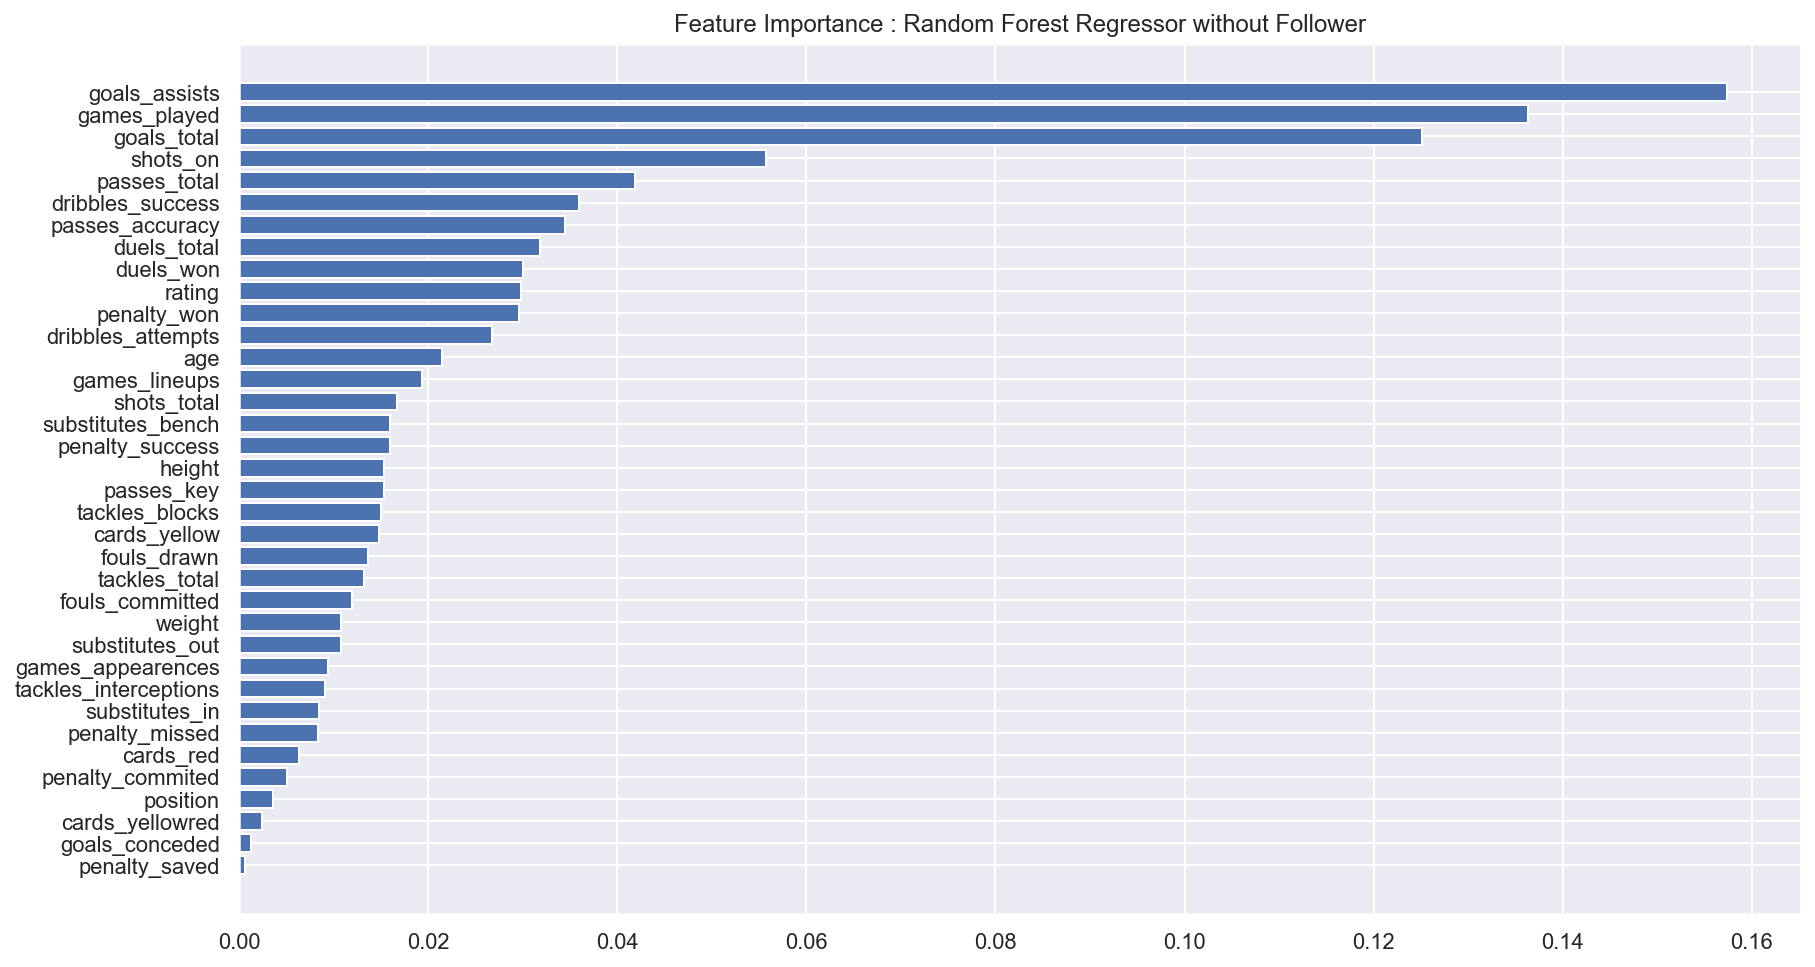

In [44]:
feature_importance(model.feature_importances_, df_nofollower.drop('value', axis=1).columns)

###### follower O

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

z = 10
scores_rm = np.zeros([2, z])
scores = np.zeros(z)

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores[i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores[i]))
    
print("모델 성능 : R2 = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[1].mean()))
print("R2 Score = {}".format(scores.mean()))

R2 = 0.34446915
mse = 208.80972762
R2 Score = -2.60088645
R2 = 0.42583776
mse = 223.58887684
R2 Score = -2.98380722
R2 = 0.19691227
mse = 197.80332251
R2 Score = -3.78190579
R2 = -0.17624841
mse = 283.90761728
R2 Score = -3.64908089
R2 = 0.01823912
mse = 449.65795528
R2 Score = -1.46710899
R2 = 0.41747946
mse = 624.50818808
R2 Score = -0.16547231
R2 = 0.49053979
mse = 230.34076715
R2 Score = -1.15292140
R2 = 0.39661938
mse = 538.65207118
R2 Score = -0.40791666
R2 = -0.15269786
mse = 364.98548405
R2 Score = -2.53783136
R2 = 0.39070239
mse = 233.12265089
R2 Score = -1.70802861
모델 성능 : R2 = 0.23518530545135646, mse = 335.53766608792665
R2 Score = -2.045495968904869


In [18]:
pd.DataFrame(model.feature_importances_, index=df.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

,Feature_Importances
follower,0.304013
goals_assists,0.072695
games_played,0.063246
goals_total,0.040990
age,0.040138
dribbles_success,0.039542
duels_total,0.034455
dribbles_attempts,0.030970
substitutes_bench,0.029628
rating,0.028407


In [40]:
# model.feature_importances_

In [47]:
from matplotlib import pyplot as plt
from sklearn import svm

def feature_importance(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names)))
    plt.figure(figsize=(14,8))
    plt.barh(range(len(names)), imp, align = 'center')
    plt.yticks(range(len(names)), names)
    plt.title('Feature Importance : Random Forest Regressor with Follower')
    plt.show()

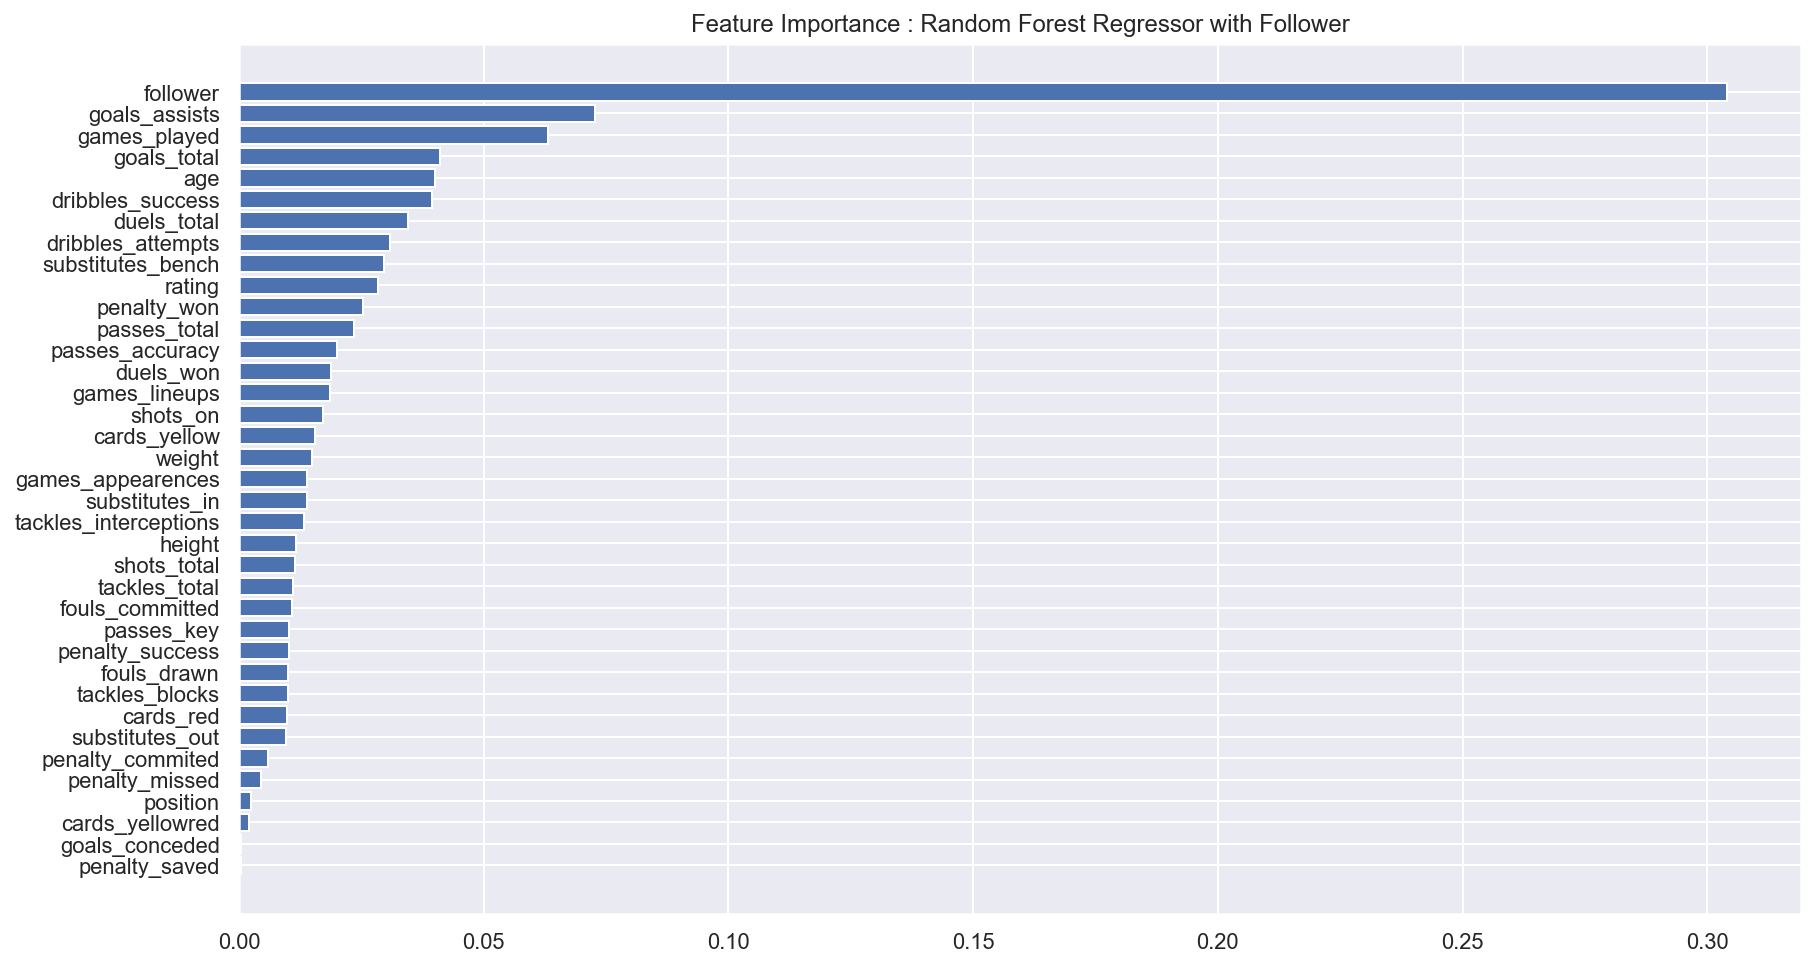

In [48]:
feature_importance(model.feature_importances_, df.drop('value', axis=1).columns)

###### Tuning

In [59]:
from pprint import pprint

rf = RandomForestRegressor()
# rf
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [62]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 23)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 100, num = 20)]
min_samples_split = [2, 5, 10, 15, 30, 50, 75, 100]
min_samples_leaf = [1, 2, 4, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [65]:
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv=5,
                               verbose=2, 
                               random_state=42,
                               n_jobs = 1
                              )

X_train, X_test, y_train, y_test = train_test_split(df_nofollower.drop('value', axis=1), df_nofollower.value, test_size=0.2)

In [67]:
model1 = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.4s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.2s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.2s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.5s
[CV] n_estimators=550, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=550, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=550, min_samples_split=50, 

[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.8s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.9s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.8s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.4s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.5s
[CV] n_estimators=850, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


In [84]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
#     errors = np.sqrt(mean_squared_error(y_test, predictions))
    errors = mean_squared_error(y_test, predictions)
    print('Model Performance')
    print('MSE of: ', errors)
    
    return errors

In [85]:
model1.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=85, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [90]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = model1.best_estimator_
best_random.fit(X_train, y_train)
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
MSE of:  278.8546
Model Performance
MSE of:  264.5192317574819


In [91]:
print('Base Accuracy: ', base_accuracy)
print('Random Accuracy: ', random_accuracy)
print('Improvement of {:0.2f}%.'.format((random_accuracy - base_accuracy)/base_accuracy))

Base Accuracy:  278.8546
Random Accuracy:  264.5192317574819
Improvement of -0.05%.


##### follower O Tuning

In [97]:
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv=5, 
                               verbose=2, 
                               random_state=42,
                               n_jobs = 1
                              )

X_train, X_test, y_train, y_test = train_test_split(df.drop('value', axis=1), df.value, test_size=0.2)

In [98]:
model2 = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.2s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.5s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.4s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.2s
[CV] n_estimators=550, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=550, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=550, min_samples_split=50, 

[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.5s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.6s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.3s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.7s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=10, max_features=log2, max_depth=100, total=   1.5s
[CV] n_estimators=850, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [99]:
model2.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=850, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [100]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = model2.best_estimator_
best_random.fit(X_train, y_train)
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
MSE of:  345.68559999999997
Model Performance
MSE of:  304.6475523188816


In [101]:
print('Base Accuracy: ', base_accuracy)
print('Random Accuracy: ', random_accuracy)
print('Improvement of {:0.2f}%.'.format((random_accuracy - base_accuracy)/base_accuracy))

Base Accuracy:  345.68559999999997
Random Accuracy:  304.6475523188816
Improvement of -0.12%.
